In [251]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
#seaborn styling
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings("ignore")

In [118]:
df = pd.read_csv("main_df.csv")

dft = df.copy()
dft.timestamp = pd.to_datetime(dft.timestamp)
dft.set_index("timestamp", inplace=True)

In [120]:
dft["day"] = dft.index.strftime("%w %a")
dft["year"] = dft.index.strftime("%Y")
dft["month"] = dft.index.strftime("%m %B")

---

# I. What's the overall state of the business from 2015-2019?

In [100]:
ypy = pd.pivot_table(dft,values="acn",index="category",columns="year",aggfunc=np.sum,margins=True)

ypy["15-16 %"] = round(((ypy['2016'] - ypy['2015'])/ypy['2015'])*100,2)
ypy["16-17 %"] = round(((ypy["2017"] - ypy["2016"])/ypy["2016"])*100,2)
ypy["17-18 %"] = round(((ypy["2018"] - ypy["2017"])/ypy["2017"])*100,2)
ypy["18-19 %"] = round(((ypy["2019"] - ypy["2018"])/ypy["2018"])*100,2)

ypy = ypy.reset_index().rename(columns={"year":"index"})

## EARNINGS: Year-Per-Year Percentage Change

In [101]:
ypy

year,category,2015,2016,2017,2018,2019,All,15-16 %,16-17 %,17-18 %,18-19 %
0,Admin,1168391,2475154,4444823,10405428,15446194,33939990,111.84,79.58,134.10,48.44
1,Bar,7018302,8154985,11916298,26460220,42466516,96016321,16.20,46.12,122.05,60.49
2,Event,446221,742488,984688,1057215,2323802,5554414,66.39,32.62,7.37,119.80
3,Fitness,1155049,1408091,1789445,1988874,3750184,10091643,21.91,27.08,11.14,88.56
4,Pro Shop,937059,1169382,1243899,1736427,2044132,7130899,24.79,6.37,39.60,17.72
5,Program,424372,216262,225292,356868,513390,1736184,-49.04,4.18,58.40,43.86
6,Tennis,3074119,4677493,5300852,6650382,9597499,29300345,52.16,13.33,25.46,44.32
7,All,14223513,18843855,25905297,48655414,76141717,183769796,32.48,37.47,87.82,56.49


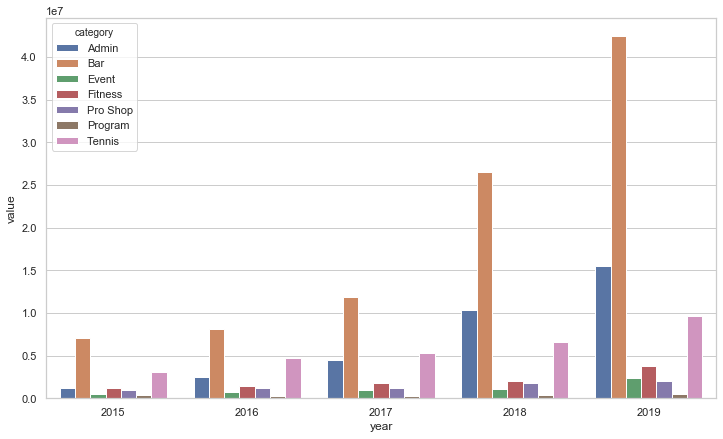

In [91]:
ypy_melt = ypy.melt(id_vars="category",var_name="year")
plt.figure(figsize=(12,7))
sns.barplot(x="year", y="value", hue="category",data=ypy_melt[(ypy_melt.year.isin(["2015","2016","2017","2018","2019"])) & (ypy_melt.category != "All")])

## FINDING: All positive change. Every year in every product line, there's increase in sales.

In [106]:
ypy_eng = pd.pivot_table(dft,values="acn",index="category",columns="year",aggfunc="count",margins=True)

ypy_eng["15-16 %"] = round(((ypy_eng['2016'] - ypy_eng['2015'])/ypy_eng['2015'])*100,2)
ypy_eng["16-17 %"] = round(((ypy_eng["2017"] - ypy_eng["2016"])/ypy_eng["2016"])*100,2)
ypy_eng["17-18 %"] = round(((ypy_eng["2018"] - ypy_eng["2017"])/ypy_eng["2017"])*100,2)
ypy_eng["18-19 %"] = round(((ypy_eng["2019"] - ypy_eng["2018"])/ypy_eng["2018"])*100,2)

ypy_eng = ypy_eng.reset_index().rename(columns={"year":"index"})

## ENGAGEMENT: Year-Per-Year Percentage Change

In [107]:
ypy_eng

year,category,2015,2016,2017,2018,2019,All,15-16 %,16-17 %,17-18 %,18-19 %
0,Admin,3167,3402,4013,6658,7709,24949,7.42,17.96,65.91,15.79
1,Bar,11426,9404,10820,17764,22435,71849,-17.70,15.06,64.18,26.29
2,Event,863,878,812,673,977,4203,1.74,-7.52,-17.12,45.17
3,Fitness,1803,1834,2125,1885,2079,9726,1.72,15.87,-11.29,10.29
4,Pro Shop,1479,1388,1199,1213,1132,6411,-6.15,-13.62,1.17,-6.68
5,Program,355,201,135,179,190,1060,-43.38,-32.84,32.59,6.15
6,Tennis,4685,4965,4844,4538,4737,23769,5.98,-2.44,-6.32,4.39
7,All,23778,22072,23948,32910,39259,141967,-7.17,8.50,37.42,19.29


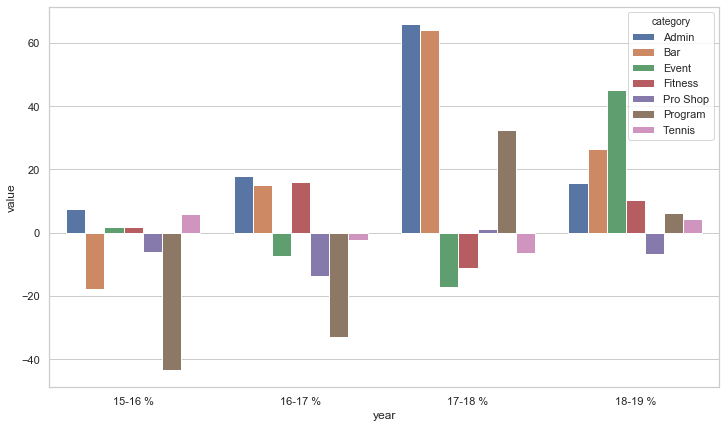

In [112]:
ypy_eng_melt = ypy_eng.melt(id_vars="category",var_name="year")
plt.figure(figsize=(12,7))
sns.barplot(x="year", y="value", hue="category",data=ypy_eng_melt[(~ypy_eng_melt.year.isin(["2015","2016","2017","2018","2019","All"])) & (ypy_eng_melt.category != "All")])

## FINDING:
- Engagement in Program is volatile.
- Admin (Membership) & Bar peaked in 2018 but steadied in 2019.
- Event rose in 2019.
- Tennis and Fitness are recovering from 2018 dip.

## SEASONALITY & TREND: Breakdown

In [114]:
df_bar = dft[dft.category == "Bar"]
df_tennis = dft[dft.category == "Tennis"]
df_program = dft[dft.category == "Program"]
df_ps = dft[dft.category == "Pro Shop"]
df_admin = dft[dft.category == "Admin"]
df_event = dft[dft.category == "Event"]
df_fitness = dft[dft.category == "Fitness"]

<Figure size 1152x504 with 0 Axes>

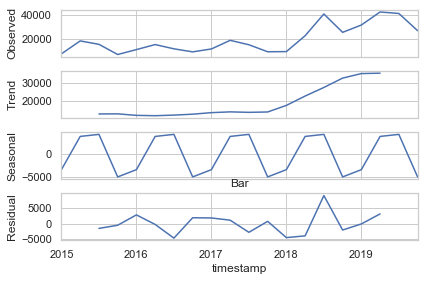

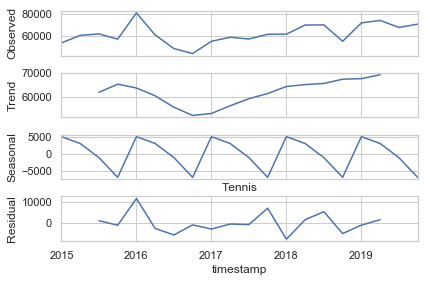

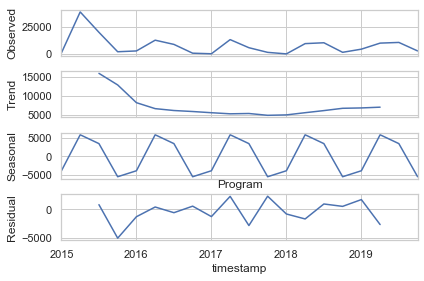

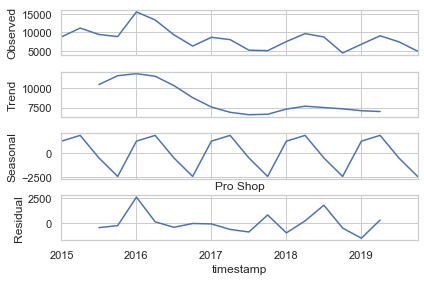

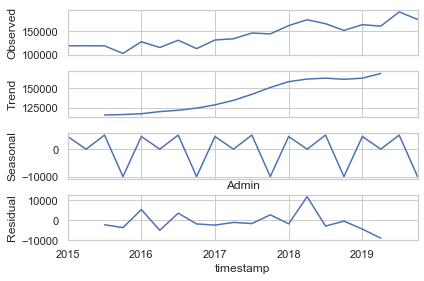

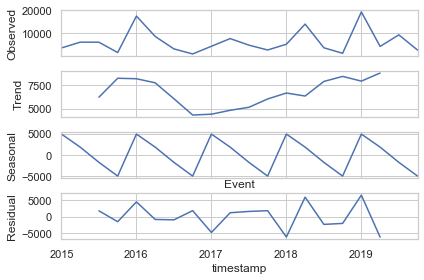

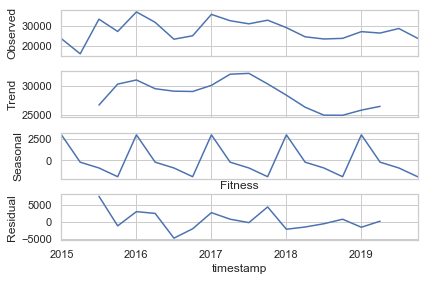

In [115]:
plt.figure(figsize=(16,7))
cat_subsets = [df_bar, df_tennis, df_program,df_ps, df_admin,df_event,df_fitness]

for i, subset in enumerate(cat_subsets):
    decomposition = sm.tsa.seasonal_decompose(subset["total"].resample('Q').sum(), model='additive')    
    fig = decomposition.plot()
    
    titles = {0:"Bar",1:"Tennis",2:"Program",3:"Pro Shop",4:"Admin",5:"Event",6:"Fitness"}
    fig.show()
    plt.title(f"{titles[i]}")

## FINDING:
- JNCC Business is **HIGHLY SEASONAL**.
- Product Lines on UPWARD Trend:
    - Bar
    - Tennis
    - Admin (Membership)
    - Event
- Product Lines on DOWNWARD Trend:
    - Program
    - Pro Shop
    - Fitness

## Month per Month Seasonality

In [142]:
mpm = pd.pivot_table(dft,values="acn",index="category",columns="month",aggfunc=np.sum)

In [143]:
mpm

month,01 January,02 February,03 March,04 April,05 May,06 June,07 July,08 August,09 September,10 October,11 November,12 December
category,,,,,,,,,,,,
Admin,2160928,2022731,2154881,2135987,2391786,3160265,3451463,3336922,3356449,3203647,3308067,3256864
Bar,5124769,4665332,6730263,7239918,9619541,11350642,13233104,10539985,8072016,7792578,5975856,5672317
Event,580917,260519,606826,316969,659662,551180,741797,476765,379179,266004,347475,367121
Fitness,845419,815074,729922,714378,1008330,656635,942402,902394,858711,1028447,856399,733532
Pro Shop,522070,536659,635726,781516,749053,595229,585444,650630,642439,562204,459228,410701
Program,8963,15270,85926,109210,208981,523859,474936,129041,17221,8756,75340,78681
Tennis,2232440,1961363,2256466,2904339,2280429,2243646,2447980,2769603,2754216,2964779,2598075,1887009


In [144]:
mpm_melt = mpm.reset_index().rename(columns={"month":"index"})

In [145]:
mpm_melt

month,category,01 January,02 February,03 March,04 April,05 May,06 June,07 July,08 August,09 September,10 October,11 November,12 December
0,Admin,2160928,2022731,2154881,2135987,2391786,3160265,3451463,3336922,3356449,3203647,3308067,3256864
1,Bar,5124769,4665332,6730263,7239918,9619541,11350642,13233104,10539985,8072016,7792578,5975856,5672317
2,Event,580917,260519,606826,316969,659662,551180,741797,476765,379179,266004,347475,367121
3,Fitness,845419,815074,729922,714378,1008330,656635,942402,902394,858711,1028447,856399,733532
4,Pro Shop,522070,536659,635726,781516,749053,595229,585444,650630,642439,562204,459228,410701
5,Program,8963,15270,85926,109210,208981,523859,474936,129041,17221,8756,75340,78681
6,Tennis,2232440,1961363,2256466,2904339,2280429,2243646,2447980,2769603,2754216,2964779,2598075,1887009


In [146]:
mpm_melt = mpm_melt.melt(id_vars="category",var_name="month")

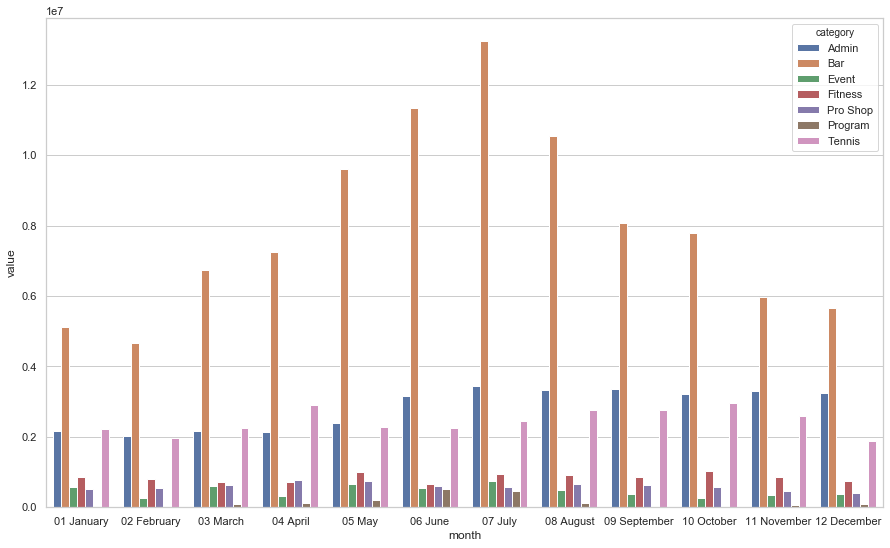

In [147]:
plt.figure(figsize=(15,9))
sns.barplot(x="month",y="value",hue="category",data=mpm_melt)

## Without Bar...

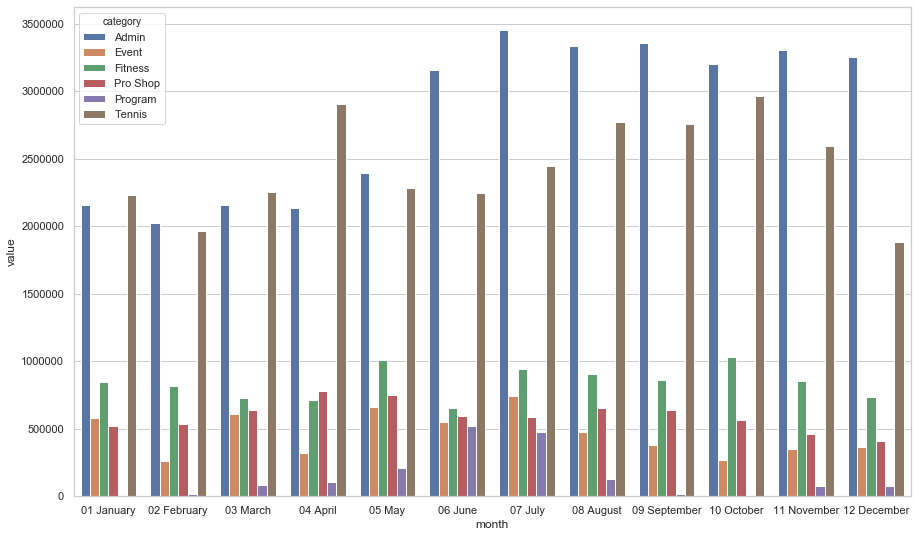

In [148]:
plt.figure(figsize=(15,9))
sns.barplot(x="month",y="value",hue="category",data=mpm_melt[mpm_melt.category!= "Bar"])

In [153]:
peak = [{"Bar":"June-Aug", "Admin":"June-Dec","Tennis":"April & October","Fitness":"May & October","Pro Shop":"May","Program":"June & July","Events":"May-July"}]
off = [{"Bar":"Jan-Feb, Nov-Dec", "Admin":"Jan-April","Tennis":"Feb & Dec","Fitness":"June","Pro Shop":"November, Dec","Program":"Jan & Feb","Events":"Feb & Oct"}]

In [162]:
peak_seasons = pd.DataFrame(peak)
off_seasons = pd.DataFrame(off)
po_seasons = pd.concat([peak_seasons,off_seasons])
po_seasons.index = ["PEAK","OFF"]

## FINDING: Peak- and Off- Seasons Months

In [171]:
po_seasons

,Admin,Bar,Events,Fitness,Pro Shop,Program,Tennis
PEAK,June-Dec,June-Aug,May-July,May & October,May,June & July,April & October
OFF,Jan-April,"Jan-Feb, Nov-Dec",Feb & Oct,June,"November, Dec",Jan & Feb,Feb & Dec


---

# II. What is driving sales?

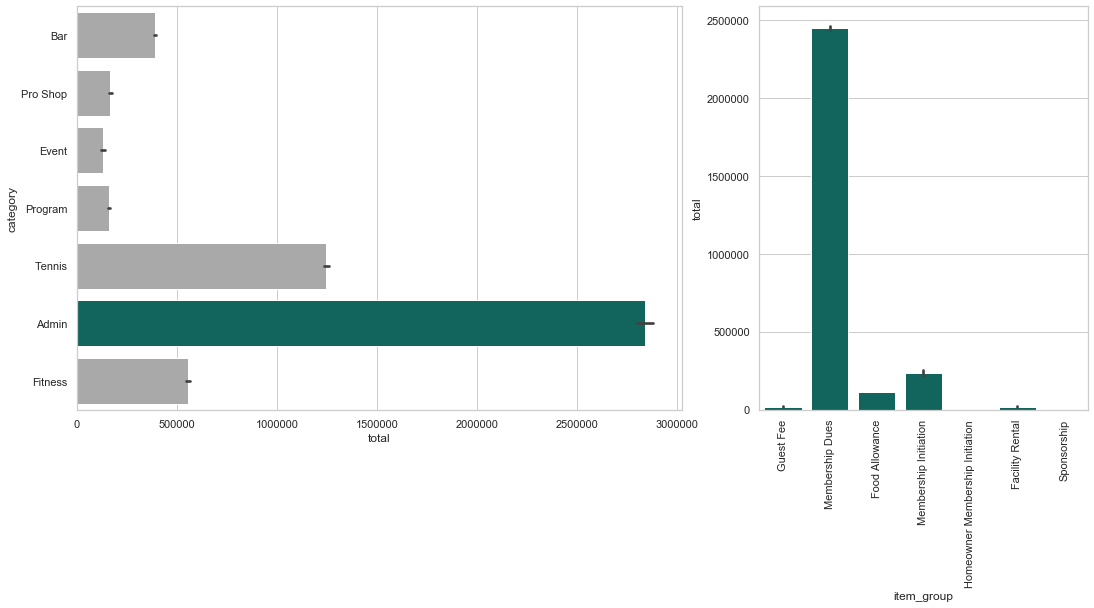

In [172]:
fig = plt.figure(figsize=(12,7))

ax1 = fig.add_axes([0.1,0.1,0.7,0.8])
ax2 = fig.add_axes([0.89,0.1,0.38,0.8])

# ax1
fig1 = sns.barplot(x="total",y="category",data=df,palette=["darkgray","darkgray","darkgray","darkgray","darkgray","#037367"],ax=ax1,estimator=sum)
# ax2
fig2 = sns.barplot(x="item_group",y="total",data=df[df.category == "Admin"],color="#037367",ax=ax2,estimator=sum)

ax2.set_xticklabels(labels=list(df[df.category == "Admin"].item_group.unique()),rotation = 90)
plt.show()

## FINDING: Membership Dues is the biggest driver of Revenue.

In [177]:
admin = dft[dft.item_group.isin(["Membership Dues","Membership Initiation"])]
admin = admin[["item_group","membership","total","month","year"]]

In [178]:
admin.head()

,item_group,membership,total,month,year
timestamp,,,,,
2018-08-31,Membership Dues,General Family Membership,149.39,08 August,2018
2018-07-31,Membership Dues,General Family Membership,149.39,07 July,2018
2018-11-30,Membership Dues,General Family Membership,149.39,11 November,2018
2018-12-31,Membership Dues,General Family Membership,149.39,12 December,2018
2018-09-30,Membership Dues,General Family Membership,149.39,09 September,2018


In [213]:
admin_ypy = admin.pivot_table("total","year","item_group",aggfunc=sum)

In [220]:
admin_mpm = admin.pivot_table("total","month","item_group",aggfunc=sum)

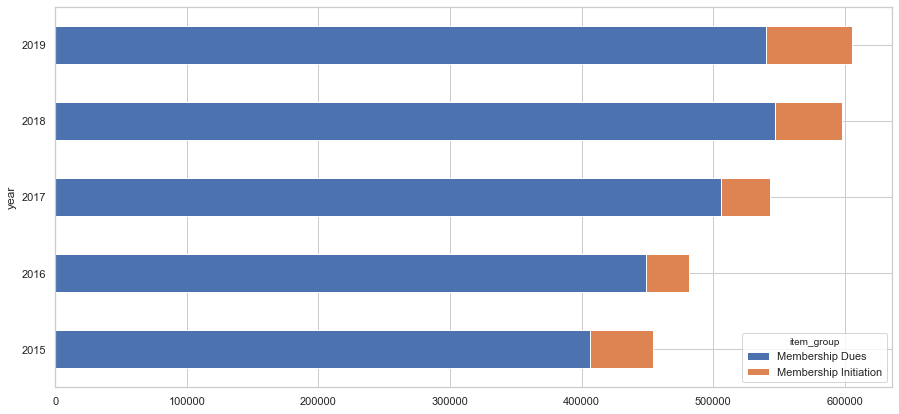

In [219]:
admin_ypy.plot(kind="barh",figsize=(15,7),stacked=True)

## FINDINGS:
 - Constant increase in Membership Dues from 2015-2018.
 - Between 2015-2019, JNCC got the most new member revenue in 2019.
 - New Member Revenue in 2018, should've fed into 2019. But 2019 Membership Dues dropped. Could be an indication of lost membership.

In [224]:
membership = dft[dft.category=="Admin"].sort_values("timestamp")

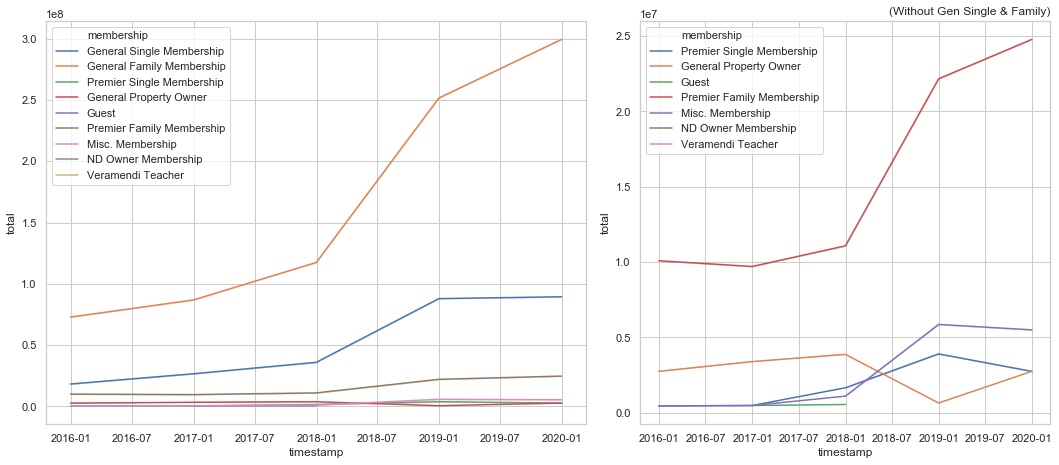

In [230]:
fig = plt.figure(figsize=(15,7))

ax1 = fig.add_axes([0.1,0.1,0.5,0.8])
ax2 = fig.add_axes([0.65,0.1,0.38,0.8])

# ax1
fig1 =  sns.lineplot(x=membership.index,y=membership.total.resample("Y").sum(),hue="membership",data=membership, estimator=sum,ax=ax1)
# ax2
fig2 =  sns.lineplot(x=membership[~membership.membership.isin(["General Single Membership","General Family Membership"])].index,y=membership.total.resample("Y").sum(),hue="membership",data=membership[~membership.membership.isin(["General Single Membership","General Family Membership"])], estimator=sum,ax=ax2)

plt.title("(Without Gen Single & Family)", loc="right")
plt.show()

## FINDINGS:
 - Bulk of the revenue comes from Gen Single, Gen Family, Premier Family.
 - General Property revenue dipped between 2018-19.

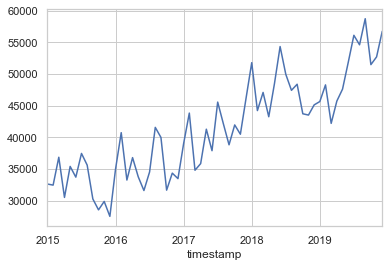

In [231]:
membership[membership.membership.isin(["General Family Membership","General Single Membership"])].total.resample("MS").sum().plot()

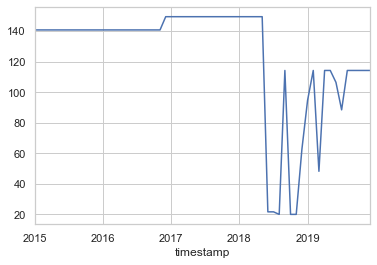

In [233]:
membership[membership.membership.isin(["General Family Membership","General Single Membership"])].total.resample("MS").median().plot()

## FINDINGS:
 - Revenue for GS and GF members dipped in late 2018 to early 2019. But trending upward.
 - Average spending for GS & GF members had been above 140, until 2018-2019 where they spend less than 120/month on average.

---

# III. Spending Profiles

In [289]:
spend = pd.pivot_table(dft,values="total",index="acn",columns="category",aggfunc=np.sum,fill_value=0).reset_index()

In [290]:
spend.head()

category,acn,Admin,Bar,Event,Fitness,Pro Shop,Program,Tennis
0,11,0.00,801.58,80.00,0.0,95.12,90.0,208.30
1,17,0.00,9.50,0.00,0.0,10.00,0.0,30.00
2,23,0.00,1015.45,0.00,0.0,10.83,0.0,1614.26
3,33,3341.25,247.31,105.12,0.0,52.94,0.0,36.00
4,34,5231.80,14.28,2552.20,0.0,0.00,0.0,0.00


In [291]:
spend.describe()

category,acn,Admin,Bar,Event,Fitness,Pro Shop,Program,Tennis
count,2725.000000,2725.000000,2725.000000,2725.000000,2725.00000,2725.000000,2725.000000,2725.00000
mean,2229.111193,1041.634294,143.134697,47.514602,203.63636,61.734628,58.731369,457.70876
std,1454.053949,2732.954456,514.206273,210.189808,1590.60365,257.300625,215.878324,1743.57717
min,11.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
25%,1069.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
50%,1991.000000,0.000000,7.500000,0.000000,0.00000,0.000000,0.000000,0.00000
75%,3274.000000,64.980000,67.370000,20.000000,0.00000,9.740000,0.000000,180.00000
max,5434.000000,51189.960000,11242.740000,3678.100000,31145.00000,4738.440000,3865.600000,33183.90000


In [292]:
r, p = stats.pearsonr(spend["Tennis"],spend["Fitness"])
print(f"r: {r}, pval: {p}")

r: 0.4224648736290715, pval: 2.05552682732104e-118


In [293]:
r, p = stats.pearsonr(spend["Fitness"],spend["Admin"])
print(f"r: {r}, pval: {p}")

r: 0.2426298865185529, pval: 8.343311079328969e-38


In [294]:
r, p = stats.pearsonr(spend["Tennis"],spend["Admin"])
print(f"r: {r}, pval: {p}")

r: 0.28261572130150775, pval: 3.2432355345692937e-51


In [295]:
r, p = stats.pearsonr(spend["Tennis"],spend["Bar"])
print(f"r: {r}, pval: {p}")

r: 0.5288539750532986, pval: 2.99367890566669e-196


In [296]:
r, p = stats.pearsonr(spend["Fitness"],spend["Bar"])
print(f"r: {r}, pval: {p}")

r: 0.21468454471328854, pval: 8.892077990928529e-30


In [297]:
r, p = stats.pearsonr(spend["Tennis"],spend["Pro Shop"])
print(f"r: {r}, pval: {p}")

r: 0.6456797701823893, pval: 2.7e-321


In [298]:
r, p = stats.pearsonr(spend["Fitness"],spend["Pro Shop"])
print(f"r: {r}, pval: {p}")

r: 0.3219576322337395, pval: 9.312424358770584e-67


In [299]:
r, p = stats.pearsonr(spend["Tennis"],spend["Event"])
print(f"r: {r}, pval: {p}")

r: 0.5758200197391237, pval: 1.732113919415243e-240


In [300]:
r, p = stats.pearsonr(spend["Fitness"],spend["Event"])
print(f"r: {r}, pval: {p}")

r: 0.25907618894735307, pval: 4.855847304467449e-43


## Findings: Strong Positive Correlations
- Fitness & Tennis Revenue are **42%** correlated
- Tennis & Bar Revenue are **53%** correlated
- Tennis & Pro Shop Revenue are **64%** correlated
- Tennis & Event Revenue are **57%** correlated

In [370]:
spenda = pd.pivot_table(dft[dft.year.isin(["2018","2019"])],values="total",index="acn",columns="category",aggfunc=np.sum,fill_value=0,margins=True).reset_index()

In [371]:
spenda.describe()

category,Admin,Bar,Event,Fitness,Pro Shop,Program,Tennis,All
count,1.854000e+03,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1.854000e+03
mean,1.445634e+03,258.787789,65.413118,222.682201,63.182902,54.542826,584.605901,2.694849e+03
std,3.114369e+04,5578.677302,1415.561293,4853.026427,1364.781231,1183.487788,12609.809989,5.804088e+04
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.500000e-01
25%,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.008000e+01
50%,0.000000e+00,11.980000,0.000000,0.000000,0.000000,0.000000,0.000000,2.270550e+02
75%,2.483925e+02,87.530000,10.000000,0.000000,0.000000,0.000000,150.007500,1.434640e+03
max,1.340103e+06,239896.280000,60637.960000,206426.400000,58570.550000,50561.200000,541929.670000,2.498125e+06


In [372]:
conditions = [spenda.All.between(min(spenda.All),2300,inclusive=True),
             spenda.All.between(2301,9999,inclusive=True).sum(),
             spenda.All.between(10000,max(spenda.All),inclusive=True).sum()]

In [373]:
choices = ["min_spender","ave_spender","high_spender"]

In [374]:
spenda["profile"] = np.select(conditions,choices,"none")

In [375]:
spenda

category,acn,Admin,Bar,Event,Fitness,Pro Shop,Program,Tennis,All,profile
0,11,0.00,547.41,35.00,0.0,12.58,0.0,208.30,803.29,min_spender
1,23,0.00,975.08,0.00,0.0,0.00,0.0,940.00,1915.08,min_spender
2,33,3299.02,233.85,45.47,0.0,0.00,0.0,0.00,3578.34,ave_spender
3,34,1427.81,0.00,1300.00,0.0,0.00,0.0,0.00,2727.81,ave_spender
4,42,2091.46,13.00,18.94,0.0,90.00,0.0,0.00,2213.40,min_spender
5,47,5591.16,20.00,0.00,0.0,0.00,0.0,0.00,5611.16,ave_spender
6,55,1142.00,276.96,34.21,0.0,58.46,0.0,1319.04,2830.67,ave_spender
7,66,2240.85,912.96,946.98,0.0,49.68,0.0,6499.50,10649.97,ave_spender
8,71,4001.15,895.38,223.92,0.0,246.58,0.0,314.00,5681.03,ave_spender
9,73,3968.66,283.02,0.00,0.0,0.00,0.0,0.00,4251.68,ave_spender


In [ ]:
cond = [spend.Tennis]

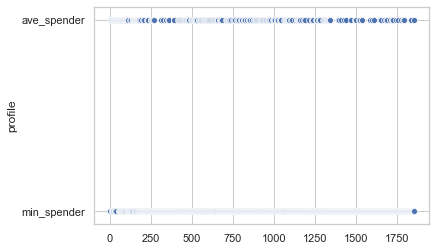

In [376]:
spenda["inclination"]